# Part 1

In [ ]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input, optimizers, initializers
from keras.datasets import mnist
from keras.models import Model, Sequential
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X=np.concatenate((xTrain,xTest))
y=np.concatenate((yTrain,yTest))
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.33)
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(46900, 28, 28)
(23100, 28, 28)
(46900,)
(23100,)


In [ ]:
xTrain=xTrain.astype('float32')/255
xTest=xTest.astype('float32')/255
yTrain = to_categorical(yTrain, 10)
yTest = to_categorical(yTest, 10)

xTrain=xTrain.reshape(xTrain.shape[0], -1)
xTest=xTest.reshape(xTest.shape[0], -1)

In [ ]:
keras.backend.clear_session()

class MLP():
  def __init__(self,inputShape, kernelInit):
    self.inputShape=inputShape
    self.createModel(kernelInit)

  def createModel(self, kernelInit):
    model=Sequential(
        [
        Input(shape=self.inputShape, name='input'),
        layers.Dense(512, activation='relu', name='layer1', kernel_initializer=kernelInit),
        layers.Dense(256, activation='relu', name='layer2', kernel_initializer=kernelInit),
        layers.Dense(128, activation='relu', name='layer3', kernel_initializer=kernelInit),
        layers.Dense(64, activation='relu', name='layer4', kernel_initializer=kernelInit),
        layers.Dense(10, activation='softmax', name='finalLayer', kernel_initializer=kernelInit),
        ]
    )
    self.model=model
    return self.model

  def compileFunc(self, lossFunc, optim):
    self.model.compile(
        loss=lossFunc, 
        optimizer=optim,
        metrics=['accuracy']
    )

  def fitModel(self, xTrain, yTrain, batchSize, epoch):
    history=self.model.fit(xTrain, yTrain, batch_size=batchSize, epochs=epoch, verbose=0, validation_split=0.1)
    return history

  def evaluateModel(self, xTest, yTest):
    scores = self.model.evaluate(xTest, yTest, verbose=0)
    print("Accuracy: ", scores[1])

def plotLoss(history, epochs, optim):
  plt.figure(figsize=(5,5))
  plt.plot(list(range(1, epochs+1)), history.history['loss'], label='Training Loss')
  plt.title(optim)
  plt.legend()
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.show()

## Adam
- Accuracy: 97.31

Accuracy:  0.9730736017227173


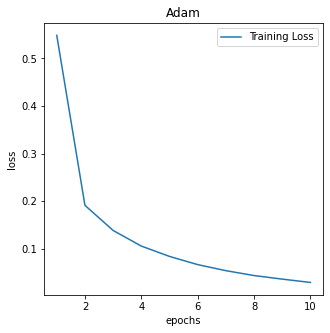

In [ ]:
keras.backend.clear_session()
loss='categorical_crossentropy'
optim=optimizers.Adam(learning_rate=0.0001)

batchSize=64
epochs=10

inputShape=(784,)

model=MLP(inputShape, None)            #kernel initializer=None
model.compileFunc(loss, optim)
history=model.fitModel(xTrain, yTrain, batchSize, epochs)
model.evaluateModel(xTest, yTest)
plotLoss(history, epochs,'Adam')

## RMS Prop
- Accuracy: 97.51

Accuracy:  0.9751082062721252


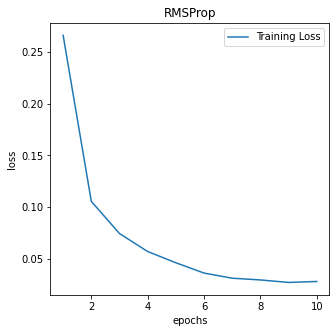

In [ ]:
keras.backend.clear_session()

loss='categorical_crossentropy'
optim=optimizers.RMSprop(learning_rate=0.001)

batchSize=64
epochs=10

inputShape=(784,)

model=MLP(inputShape, None)            #kernel initializer=None
model.compileFunc(loss, optim)
history=model.fitModel(xTrain, yTrain, batchSize, epochs)
model.evaluateModel(xTest, yTest)
plotLoss(history, epochs,'RMSProp')

## SGD with Momentum
- Accuracy: 97.22

Accuracy:  0.972164511680603


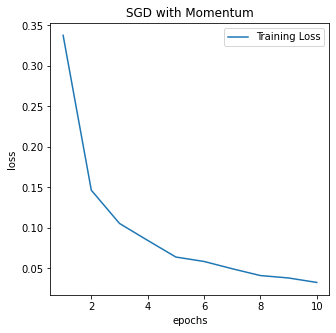

In [ ]:
keras.backend.clear_session()

loss='categorical_crossentropy'
optim=optimizers.SGD(learning_rate=0.1, momentum=0.9)

batchSize=1
epochs=10

inputShape=(784,)

model=MLP(inputShape, None)            #kernel initializer=None
model.compileFunc(loss, optim)
history=model.fitModel(xTrain, yTrain, batchSize, epochs)
model.evaluateModel(xTest, yTest)
plotLoss(history, epochs,'SGD with Momentum')

## SGD w/o Momentum
- Accuracy: 97.78

Accuracy:  0.9778788089752197


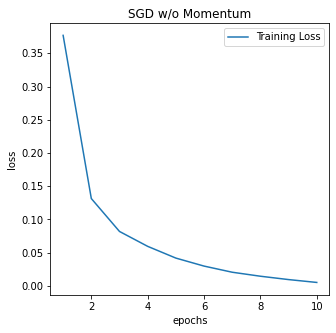

In [ ]:
keras.backend.clear_session()

loss='categorical_crossentropy'
optim=optimizers.SGD(learning_rate=0.1)

batchSize=1
epochs=10

inputShape=(784,)

model=MLP(inputShape, None)            #kernel initializer=None
model.compileFunc(loss, optim)
history=model.fitModel(xTrain, yTrain, batchSize, epochs)
model.evaluateModel(xTest, yTest)
plotLoss(history, epochs,'SGD w/o Momentum')

## Kernel Initializers

### Xavier
- No change in accuracy: 97.79

Accuracy:  0.9778788089752197


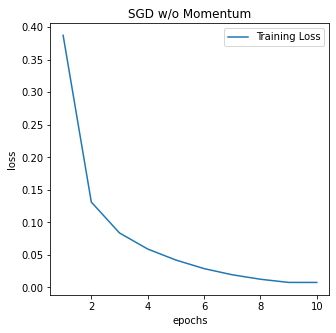

In [ ]:
keras.backend.clear_session()

loss='categorical_crossentropy'
optim=optimizers.SGD(learning_rate=0.1)
kernelInit=initializers.GlorotNormal()

batchSize=64
epochs=10

inputShape=(784,)

model=MLP(inputShape, kernelInit)            #kernel initializer=Xavier
model.compileFunc(loss, optim)
history=model.fitModel(xTrain, yTrain, batchSize, epochs)
model.evaluateModel(xTest, yTest)
plotLoss(history, epochs,'SGD w/o Momentum')

### Uniform
- Accuracy reduced drastically: 11.49

Accuracy:  0.11489177495241165


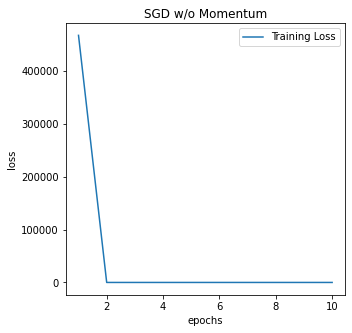

In [ ]:
keras.backend.clear_session()

loss='categorical_crossentropy'
optim=optimizers.SGD(learning_rate=0.001)
kernelInit=initializers.RandomUniform(minval=0, maxval=1)

batchSize=64
epochs=10

inputShape=(784,)

model=MLP(inputShape, kernelInit)            #kernel initializer=Xavier
model.compileFunc(loss, optim)
history=model.fitModel(xTrain, yTrain, batchSize, epochs)
model.evaluateModel(xTest, yTest)
plotLoss(history, epochs,'SGD w/o Momentum')

### Normal
- Accuracy decreased drastically (67.64)
- Learning rate too low (1e-6)

Accuracy:  0.6764069199562073


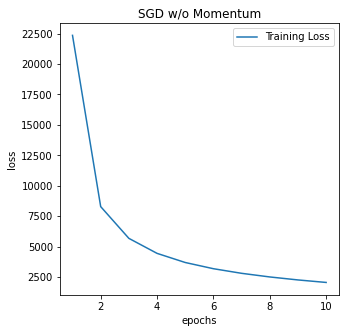

In [ ]:
keras.backend.clear_session()

loss='categorical_crossentropy'
optim=optimizers.SGD(learning_rate=0.000001)
kernelInit=initializers.RandomNormal(mean=0, stddev=1)

batchSize=64
epochs=10

inputShape=(784,)

model=MLP(inputShape, kernelInit)            #kernel initializer=Xavier
model.compileFunc(loss, optim)
history=model.fitModel(xTrain, yTrain, batchSize, epochs)
model.evaluateModel(xTest, yTest)
plotLoss(history, epochs,'SGD w/o Momentum')

## Exponential Annealing

##### **Initial learning rate**=0.01
##### **Decay steps**=10000

- **Accuracy**: 95.43

Accuracy:  0.954285740852356


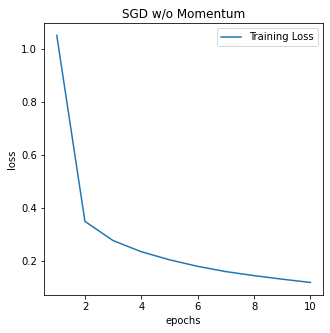

In [ ]:
keras.backend.clear_session()

lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
optim = optimizers.SGD(learning_rate=lr_schedule)

loss='categorical_crossentropy'

batchSize=64
epochs=10

inputShape=(784,)

model=MLP(inputShape, None)            #kernel initializer=Xavier
model.compileFunc(loss, optim)
history=model.fitModel(xTrain, yTrain, batchSize, epochs)
model.evaluateModel(xTest, yTest)
plotLoss(history, epochs,'SGD w/o Momentum')

##### **Initial learning rate**=0.1
##### **Decay steps**=1000

- **Accuracy**: 97.73

Accuracy:  0.9773160219192505


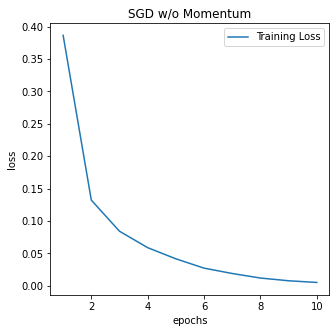

In [ ]:
keras.backend.clear_session()

lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=1000,
    decay_rate=0.9)
optim = optimizers.SGD(learning_rate=lr_schedule)

loss='categorical_crossentropy'

batchSize=64
epochs=10

inputShape=(784,)

model=MLP(inputShape, None)            #kernel initializer=Xavier
model.compileFunc(loss, optim)
history=model.fitModel(xTrain, yTrain, batchSize, epochs)
model.evaluateModel(xTest, yTest)
plotLoss(history, epochs,'SGD w/o Momentum')

##### **Initial learning rate**=0.1
##### **Decay steps**=10000

- **Accuracy**: 97.75

Accuracy:  0.9775324463844299


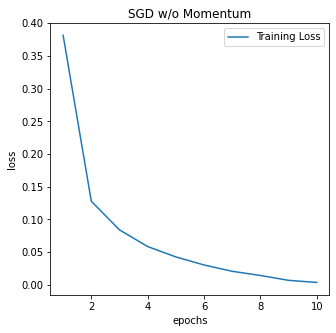

In [ ]:
keras.backend.clear_session()

lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=10000,
    decay_rate=0.9)
optim = optimizers.SGD(learning_rate=lr_schedule)

loss='categorical_crossentropy'

batchSize=64
epochs=10

inputShape=(784,)

model=MLP(inputShape, None)            #kernel initializer=Xavier
model.compileFunc(loss, optim)
history=model.fitModel(xTrain, yTrain, batchSize, epochs)
model.evaluateModel(xTest, yTest)
plotLoss(history, epochs,'SGD w/o Momentum')

# Part 2

### MLP using under complete autoencoder as input
- **Accuracy**: 96.72
- **Accuracy w/o compression**: 97.78

In [ ]:
class MLP():
  def __init__(self,inputShape, kernelInit, codeDim):
    self.inputShape=inputShape
    self.codeDim=codeDim
    self.createModel(kernelInit)

  def createModel(self, kernelInit):
    inputImg=Input(shape=self.inputShape, name='input')
    encoder=Sequential(
        [
        Input(shape=self.inputShape),
        layers.Dense(512, activation='relu', name='encLayer1'),
        layers.Dense(256, activation='relu', name='encLayer2'),
        layers.Dense(128, activation='relu', name='encLayer3'),
        layers.Dense(self.codeDim, activation='linear', name='encLayer4')      
        ]
    )
    latentVector=encoder(inputImg)

    model=Sequential(
        [
        Input(shape=(self.codeDim,), name='input'),
        layers.Dense(512, activation='relu', name='layer1', kernel_initializer=kernelInit),
        layers.Dense(256, activation='relu', name='layer2', kernel_initializer=kernelInit),
        layers.Dense(128, activation='relu', name='layer3', kernel_initializer=kernelInit),
        layers.Dense(64, activation='relu', name='layer4', kernel_initializer=kernelInit),
        layers.Dense(10, activation='softmax', name='finalLayer', kernel_initializer=kernelInit),
        ]
    )

    mlpOut=model(latentVector)
    model=Model(inputs=inputImg, outputs=mlpOut)
    self.model=model
    return self.model

  def compileFunc(self, lossFunc, optim):
    self.model.compile(
        loss=lossFunc, 
        optimizer=optim,
        metrics=['accuracy']
    )

  def fitModel(self, xTrain, yTrain, batchSize, epoch):
    history=self.model.fit(xTrain, yTrain, batch_size=batchSize, epochs=epoch, verbose=0, validation_split=0.1)
    return history

  def evaluateModel(self, xTest, yTest):
    scores = self.model.evaluate(xTest, yTest, verbose=0)
    print("Accuracy: ", scores[1])

def plotLoss(history, epochs, optim):
  plt.figure(figsize=(5,5))
  plt.plot(list(range(1, epochs+1)), history.history['loss'], label='Training Loss')
  plt.title(optim)
  plt.legend()
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.show()

Accuracy:  0.967229425907135


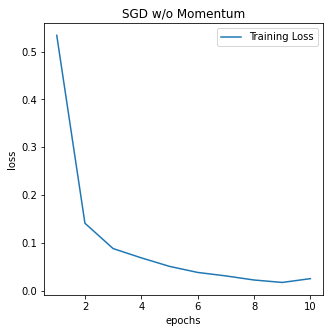

In [ ]:
keras.backend.clear_session()

loss='categorical_crossentropy'
optim=optimizers.SGD(learning_rate=0.1)

batchSize=64
epochs=10

inputShape=(784,)

model=MLP(inputShape, None, 64)            #kernel initializer=None
model.compileFunc(loss, optim)
history=model.fitModel(xTrain, yTrain, batchSize, epochs)
model.evaluateModel(xTest, yTest)
plotLoss(history, epochs,'SGD w/o Momentum')